In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

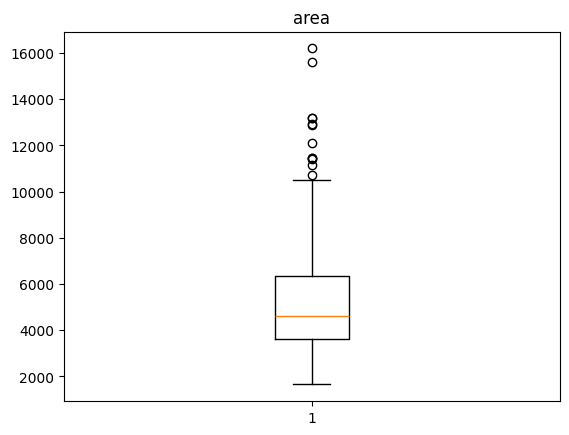

In [7]:
plt.boxplot(df["area"])
plt.title("area")
plt.show()

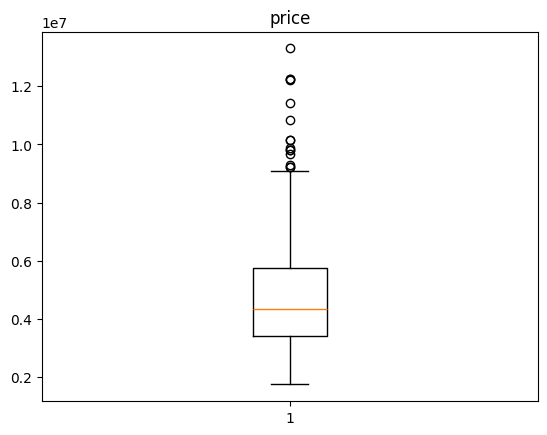

In [8]:
plt.boxplot(df["price"])
plt.title("price")
plt.show()

In [9]:
upper=df["area"].quantile(0.05)
lower=df["area"].quantile(0.95)
df["area"]=np.clip(df["area"],lower,upper)

In [7]:
upper=df["price"].quantile(0.05)
lower=df["price"].quantile(0.95)
df["price"]=np.clip(df["price"],lower,upper)

In [8]:
x=df[["area"]]
y=df["price"]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(x_test)

In [15]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [16]:
print("mse: ",mse)
print("r2: ",r2)

mse:  2447905104210.5337
r2:  0.2868358149347988


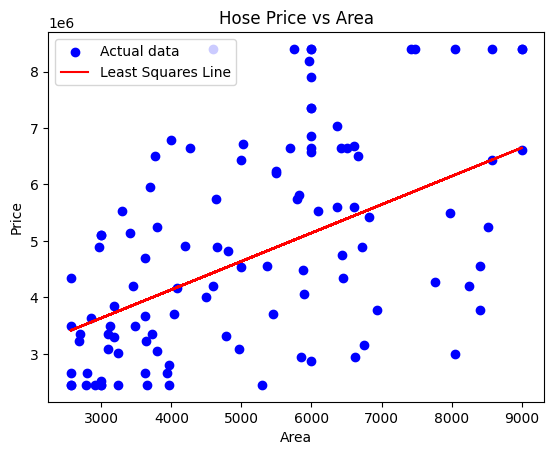

In [18]:
# Plot
plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, y_pred, color='red', label='Least Squares Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Hose Price vs Area')
plt.legend()
plt.show()